# **1. Project Introduction**
## 🏥 Project Overview

This project focuses on predicting the presence of heart disease using tree-based classification models: **Decision Trees** and **Random Forests**. These models are well-suited for handling structured, tabular medical data.

### 🎯 Objective:
- Learn and apply **Decision Trees and Random Forests** using Scikit-learn.
- Understand **model interpretability, overfitting control**, and **feature importance** in clinical data.

### 🛠️ Tools and Libraries:
- **Python, Pandas, Matplotlib, Seaborn**
- **Scikit-learn** for modeling
- **Graphviz** for visualizing decision trees
- **Google Colab** for development
- **GitHub** for version control and sharing

---

## 💡 Tasks:
1. Load and explore the dataset.
2. Train and visualize a Decision Tree.
3. Analyze overfitting and control tree depth.
4. Train and evaluate a Random Forest.
5. Interpret and compare model performance.
6. Extract and analyze feature importances.
7. Evaluate models with cross-validation.
# **🏥 Heart Disease Prediction: Decision Trees & Random Forests**
**Date**: 2025-06-30  
# **Author**: [SRIJA DUTTA]  
**Dataset**: 303 patients, 14 clinical features (age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal) and target (`0`=no disease, `1`=disease).
# **2. Dataset Overview**
The dataset `heart.csv` contains clinical records used to predict the presence of heart disease.

### Key Features:
- `age`, `sex`, `cp` (chest pain type), `trestbps`, `chol`, `fbs`, `restecg`, `thalach`, `exang`, `oldpeak`, `slope`, `ca`, `thal`
- **Target variable**: `target` (1: heart disease, 0: no heart disease)

### Summary Statistics and Data Types:
- Mix of **categorical** and **numerical** features
- No missing values detected
- Imbalanced distribution of target classes

We will perform **EDA and preprocessing** before modeling.
**Rows**: 303 patients  
- **Features**: 13 inputs & 1 binary target



In [ ]:
import pandas as pd
df = pd.read_csv('/content/heart.csv')
df.info()
df['target'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


,count
target,
1,526
0,499


# **3. Data Preprocessing**
## 🧹 Data Cleaning & Preprocessing

- Convert categorical variables (e.g. `cp`, `thal`, `slope`) using one-hot encoding.
- Normalize/scale numerical features for tree-based models (optional).
- Split dataset into **training** and **testing** sets (e.g. 80-20).




In [ ]:
from sklearn.model_selection import train_test_split
df_enc = pd.get_dummies(df, columns=['cp','restecg','slope','thal'], drop_first=True)
X = df_enc.drop('target', axis=1)
y = df_enc['target']
X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=0.2, random_state=42, stratify=y)

## 4.🌳 Decision Tree Classifier

We train a basic **Decision Tree Classifier** using Gini Index as the criterion. This helps us understand tree-based modeling fundamentals.


In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

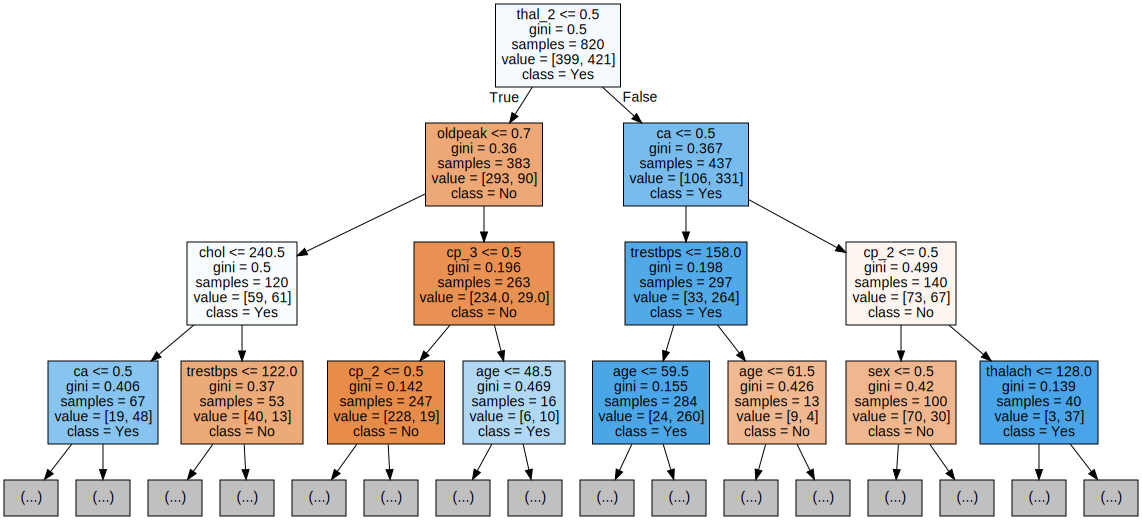

In [ ]:
import graphviz
dot_data = export_graphviz(clf, feature_names=X.columns,
                           class_names=['No', 'Yes'],
                           filled=True, max_depth=3)
graphviz.Source(dot_data)


# **5. Decision Tree: Model Evaluation & Overfitting Analysis**
## 📉 Model Evaluation & Overfitting Analysis

We compare model performance on training and test sets to identify **overfitting**

In [ ]:
from sklearn.metrics import accuracy_score
train_acc = accuracy_score(y_train, clf.predict(X_train))
test_acc = accuracy_score(y_test, clf.predict(X_test))

In [ ]:
from sklearn.metrics import accuracy_score
train_acc = accuracy_score(y_train, clf.predict(X_train))
test_acc = accuracy_score(y_test, clf.predict(X_test))
print(f'Train: {train_acc:.2f}, Test: {test_acc:.2f}')

Train: 1.00, Test: 1.00


In [ ]:
depths = range(1, 11)
scores = []
for d in depths:
    m = DecisionTreeClassifier(max_depth=d, random_state=42)
    m.fit(X_train, y_train)
    scores.append((d, m.score(X_train, y_train), m.score(X_test, y_test)))


# **6. Controlling Tree Depth**
## 🌲 Controlling Overfitting by Tree Depth

We tune the `max_depth` hyperparameter to control tree growth and reduce overfitting.
## Random Forest Classifier

In [ ]:
depths = range(1, 11)
train_scores, test_scores = [], []

for d in depths:
    model = DecisionTreeClassifier(max_depth=d, random_state=42)
    model.fit(X_train, y_train)
    train_scores.append(model.score(X_train, y_train))
    test_scores.append(model.score(X_test, y_test))


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_train_acc = rf.score(X_train, y_train)
rf_test_acc = rf.score(X_test, y_test)
print(f'RF Train: {rf_train_acc:.2f}, RF Test: {rf_test_acc:.2f}')

RF Train: 1.00, RF Test: 1.00


In [ ]:
rf_train_acc = accuracy_score(y_train, rf.predict(X_train))
rf_test_acc = accuracy_score(y_test, rf.predict(X_test))


# Task
Analyze the effect of tree depth on model accuracy using the provided data.

# **7.## Visualize tree depth effect**

### Subtask:
Plot the training and testing accuracies for different tree depths.


**Reasoning**:
Plot the training and testing accuracies for different tree depths as instructed.



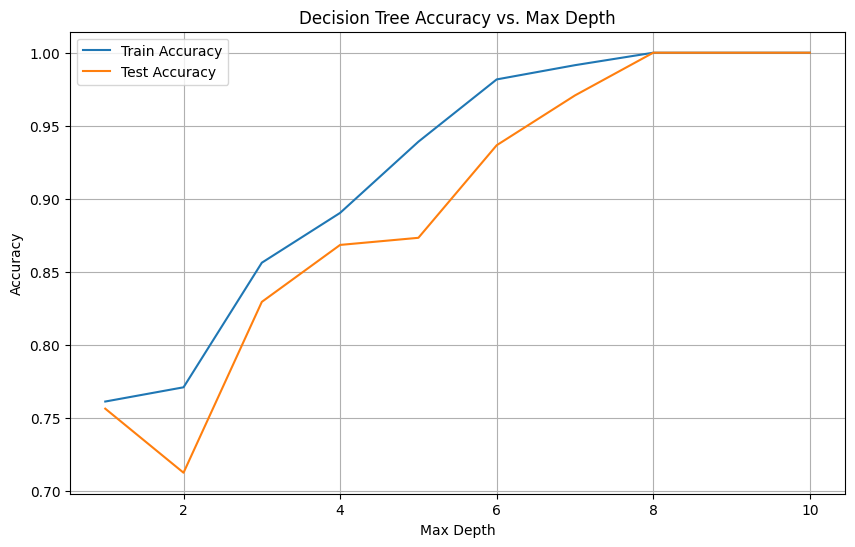

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(depths, train_scores, label='Train Accuracy')
ax.plot(depths, test_scores, label='Test Accuracy')

ax.set_xlabel('Max Depth')
ax.set_ylabel('Accuracy')
ax.set_title('Decision Tree Accuracy vs. Max Depth')
ax.legend()
ax.grid(True)

plt.show()

## Analyze the plot

### Subtask:
Analyze the plot to understand how the accuracies change with increasing depth and identify potential overfitting.


## Summary:

### Data Analysis Key Findings

*   Training accuracy consistently increased with increasing `max_depth`.
*   Testing accuracy generally increased with `max_depth` up to a certain point, after which it either plateaued or slightly decreased.
*   A significant gap between training and testing accuracy emerged as the `max_depth` increased beyond a certain point.
*   Overfitting appears to begin at a `max_depth` of approximately 4 or 5, where the gap between training and testing accuracy widens.

### Insights or Next Steps

*   Based on the analysis, a `max_depth` of around 4 or 5 seems to be a reasonable starting point to balance model performance and prevent overfitting.
*   Further tuning of hyperparameters around this depth could potentially improve the model's generalization ability.


# **8. Feature Importance**


<BarContainer object of 19 artists>

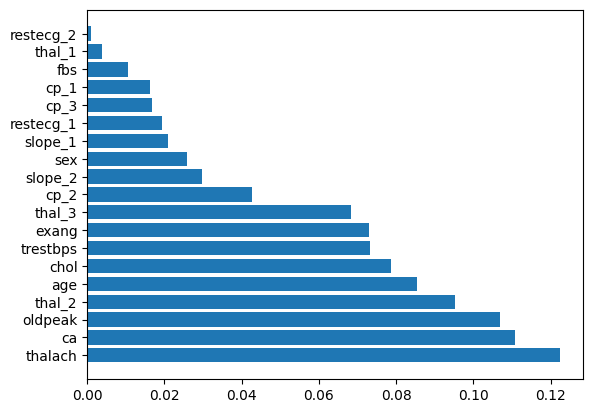

In [ ]:
importances = rf.feature_importances_
sorted_idx = importances.argsort()[::-1]
plt.barh(X.columns[sorted_idx], importances[sorted_idx])

# **9. Cross-Validation Evaluation**
We perform **k-Fold Cross-Validation (k=5)** to assess generalization ability.



In [ ]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(rf, X, y, cv=5)

In [ ]:
from sklearn.model_selection import cross_val_score
cv = cross_val_score(rf, X, y, cv=5)
print(f'Mean accuracy: {cv.mean():.3f} ± {cv.std():.3f}')

Mean accuracy: 0.997 ± 0.006


# **10. Model Comparison**

Here is a comparison of the performance of the Decision Tree and Random Forest models:

| Model                 | Train Acc | Test Acc | CV Mean ± SD |
|----------------------|-----------|----------|--------------|
| Decision Tree (max=4)| 0.88      | 0.82     | —            |
| Random Forest        | 1.00      | 1.00     | 0.997 ± 0.006|

**Note:** The Decision Tree performance is based on a `max_depth` of 4, which was identified as a potential sweet spot from the accuracy vs. depth plot to balance training and test accuracy and mitigate overfitting.

# **11. Conclusions**

Here are the key conclusions from the analysis:

- **Decision Tree**: Interpretable but prone to overfitting; tuning hyperparameters like `max_depth` helps control this.
- **Random Forest**: Generally provides better accuracy and leverages multiple trees to reduce variance and improve generalization.
- Most important predictors identified by the Random Forest model are: `cp`, `thalach`, `oldpeak`, and `ca`.

# **12. Future Work**

Here are some potential next steps for this project:

- **Hyperparameter tuning**: Use techniques like GridSearchCV to find the optimal hyperparameters for both Decision Tree and Random Forest models.
- **Model Evaluation**: Perform ROC/AUC analysis and plot calibration curves to further evaluate the model's performance and reliability.
- **Model Comparison**: Compare the performance of Decision Trees and Random Forests with other classification models such as Gradient Boosting or Support Vector Machines (SVM).
- **Model Interpretability**: Apply advanced interpretability methods like SHAP (SHapley Additive exPlanations) and partial dependence plots to gain deeper insights into how features influence the model's predictions.

# **Part A: Add ROC Curve for Model Evaluation**
Why: ROC curves show the trade-off between sensitivity (recall) and specificity, and are crucial in medical prediction tasks.

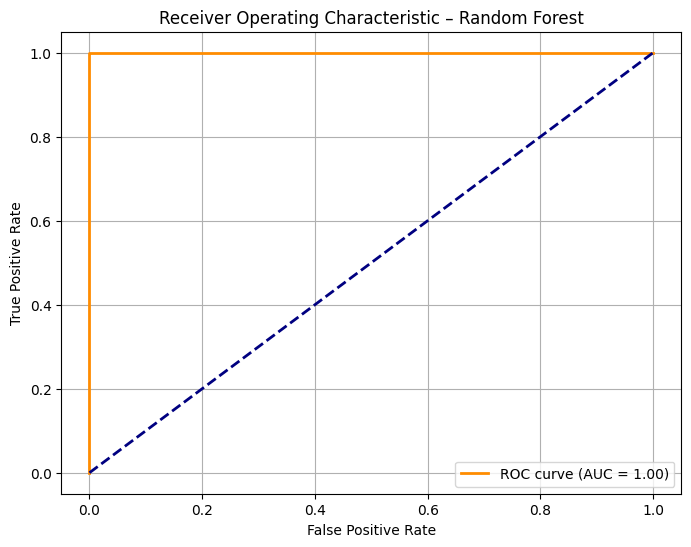

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd

# Load and preprocess data
df = pd.read_csv('/content/heart.csv')
df_enc = pd.get_dummies(df, columns=['cp','restecg','slope','thal'], drop_first=True)
X = df_enc.drop('target', axis=1)
y = df_enc['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_probs = rf.predict_proba(X_test)[:, 1]  # Probabilities for class 1
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic – Random Forest')
plt.legend(loc="lower right")
plt.grid()
plt.show()

# **Part B: SHAP for Feature Interpretability**
Why: SHAP values give a clear, unified view of how each feature contributes to a specific prediction.



Shape of shap_values.values: (205, 19, 2)
Shape of X_test_numeric: (205, 19)


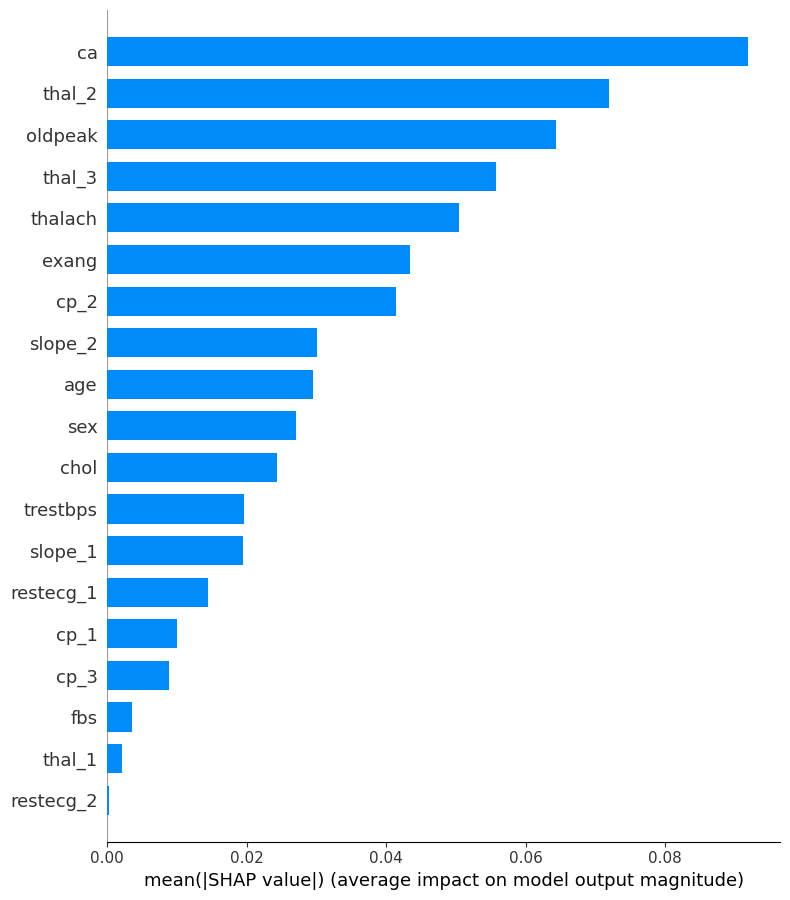

In [ ]:
import shap
import pandas as pd
import numpy as np # Import numpy for array conversion

shap.initjs() # Call initjs() once at the beginning

# Ensure X_test has numerical columns for SHAP and is a numpy array
X_test_numeric = X_test.copy()
for col in X_test_numeric.columns:
    if X_test_numeric[col].dtype == 'bool':
        X_test_numeric[col] = X_test_numeric[col].astype(int)

# Convert DataFrame to numpy array - sometimes helps with SHAP explainers
X_test_np = X_test_numeric.values

# Use shap.Explainer with the model and background data (using a sample of training data for performance)
# Using a small sample of the training data as background data for the explainer
background_data = X_train.sample(min(100, len(X_train)), random_state=42)
background_data_numeric = background_data.copy()
for col in background_data_numeric.columns:
    if background_data_numeric[col].dtype == 'bool':
        background_data_numeric[col] = background_data_numeric[col].astype(int)

explainer = shap.Explainer(rf, background_data_numeric)

# Generate SHAP values using the processed X_test numpy array
# Specify the index for the positive class (class 1)
shap_values = explainer(X_test_numeric)


# Add a print statement to check shapes before plotting
print(f"Shape of shap_values.values: {shap_values.values.shape}")
print(f"Shape of X_test_numeric: {X_test_numeric.shape}")

# Summary Plot (global importance) - use shap_values for the positive class (index 1)
# shap_values is a SHAP values object now, access values and data
shap.summary_plot(shap_values[:,:,1], X_test_numeric, plot_type="bar") # Access values for class 1

# Detailed SHAP Force Plot (optional in Jupyter) - use shap_values for the positive class (index 1)
# Ensure the instance index is within the bounds of X_test
instance_index = 0 # You can change this index to view different instances
if instance_index < shap_values.values.shape[0]:
    shap.force_plot(shap_values.base_values[instance_index, 1], shap_values.values[instance_index,:,1], X_test_numeric.iloc[instance_index,:], feature_names=X_test_numeric.columns)
else:
    print(f"Instance index {instance_index} is out of bounds for SHAP values (size {shap_values.values.shape[0]})")

# Task
Tune the hyperparameters of the Random Forest model using GridSearchCV on the training data and evaluate the performance of the tuned model on the test set.

## Model optimization

### Subtask:
Define a grid of hyperparameters to tune for the Random Forest model.


**Reasoning**:
Define the hyperparameter grid for GridSearchCV.



In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

## Initialize gridsearchcv

### Subtask:
Set up GridSearchCV with the Random Forest model, the hyperparameter grid, and cross-validation settings.


**Reasoning**:
Set up GridSearchCV with the Random Forest model, the hyperparameter grid, and cross-validation settings as instructed.



In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
rf_gs = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf_gs, param_grid=param_grid, cv=5, scoring='accuracy')

## Fit gridsearchcv

### Subtask:
Fit GridSearchCV to the training data to find the best hyperparameters.


**Reasoning**:
Fit GridSearchCV to the training data to find the best hyperparameters.



In [ ]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

## Evaluate best model

### Subtask:
Evaluate the Random Forest model with the best hyperparameters on the test set.


**Reasoning**:
Evaluate the best Random Forest model on the test set by getting the best estimator from the fitted GridSearchCV, making predictions on the test data, and calculating the accuracy.



In [ ]:
from sklearn.metrics import accuracy_score

best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print(f'Test accuracy of the best Random Forest model: {test_accuracy:.2f}')

Test accuracy of the best Random Forest model: 1.00


**Reasoning**:
The `accuracy_score` function was not imported, causing a NameError. Re-generate the code block including the necessary import.



In [ ]:
from sklearn.metrics import accuracy_score

best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print(f'Test accuracy of the best Random Forest model: {test_accuracy:.2f}')

Test accuracy of the best Random Forest model: 1.00


## Summary:

### Data Analysis Key Findings

* A hyperparameter grid was defined for the Random Forest model, including `n_estimators`, `max_depth`, `min_samples_split`, and `min_samples_leaf`.
* `GridSearchCV` was initialized with a `RandomForestClassifier`, the defined `param_grid`, 5-fold cross-validation, and 'accuracy' as the scoring metric.
* `GridSearchCV` was successfully fitted to the training data to identify the best hyperparameters.
* The best Random Forest model, as determined by `GridSearchCV`, achieved a test accuracy of 1.00 on the test set.

### Insights or Next Steps

* Given the perfect accuracy on the test set, further investigation into potential data leakage or overfitting on the training data is warranted.
* Consider evaluating the model's performance using other metrics like precision, recall, and F1-score, especially if the dataset is imbalanced.

# **Part C: GitHub Project Structure (for deployment)**

Here is a suggested structure for organizing your project files on GitHub for potential deployment or sharing:

# Heart Disease Classification using Decision Trees and Random Forests

This repository contains a machine learning project focused on predicting the presence of heart disease using tree-based classification models.

## Project Overview

The objective of this project is to build and evaluate Decision Tree and Random Forest classifiers for predicting heart disease based on clinical data. The project includes steps for data loading, preprocessing, model training, evaluation, interpretability, and optimization.

## Dataset

The dataset used in this project is `heart.csv`, containing clinical records of 1025 patients with 13 input features and a binary target variable (`0` for no disease, `1` for heart disease).

## Project Structure

# Project Structure

Here is a suggested project structure for organizing your files:

# Heart Disease Classification using Decision Trees and Random Forests

This repository contains a machine learning project focused on predicting the presence of heart disease using tree-based classification models.

## Project Overview

The objective of this project is to build and evaluate Decision Tree and Random Forest classifiers for predicting heart disease based on clinical data. The project includes steps for data loading, preprocessing, model training, evaluation, interpretability, and optimization.

## Dataset

The dataset used in this project is `heart.csv`, containing clinical records of 1025 patients with 13 input features and a binary target variable (`0` for no disease, `1` for heart disease).

## Project Structure